# üöÇ **Analyse du r√©seau ferr√© de la SNCF: Comment expliquer les retards permanents de la compagnie fran√ßaise ?** üöÇ



Comme tout bon √©tudiant provincial du plateau de Saclay, nous avons r√©guli√®rement eu √† faire aux retards in√©luctables des trains de la SNCF. A l'heure o√π le train est de plus en plus destin√© √† remplacer l'aviation civile ultra-polluante, nous avons voulu analyser l'√©volution et les causes des retards que subissent fr√©quemment les usagers du r√©seau ferr√© fran√ßais. 

Pour cela, nous avons bas√© notre analyse sur diff√©rentes bases de donn√©es rendues publiques et entretenues par la SNCF elle m√™me. Ce travail a vocation √† r√©pondre aux exigences du cours de **Python pour la Data Science** de 2√®me ann√©e de l'ENSAE Paris et reprend la m√™me articulation en 3 axes: 
- R√©cup√©ration et traitement des donn√©es
- Analyse descriptive et repr√©sentation graphique
- Mod√©lisation 

Tout au long de ce notebook, nous ferons appel √† des fonctions utiles d√©finies dans le fichier **fonctions.py**. A la fin du travail d'analyse, nous vous proposons √©galement un petit jeu int√©ractif bonus √† ouvrir dans un autre √©diteur de code que Jupyter. 

## **1. R√âCUP√âRATION DE DONN√âES : importation et traitement des donn√©es de l'API de la SNCF**

On commence par importer les packages et les fonctions d√©finies dans le fichier **fonction.py**

In [60]:
from fonctions import *

Nous avons commenc√© notre travail sur le site de l'API SNCF *https://ressources.data.sncf.com/api/v2/console*. Il propose d'acc√©der √† plus de 216 datasets qui regroupent diff√©rents types de donn√©es concernant la SNCF. Le premier fichier que nous avons √©tudi√© est le **Catalogue** qui pr√©sente tous les autres datasets disponnibles. C'est √† partir de ce Catalogue que nous avons pu identifier les diff√©rents datasets utiles √† nos analyses.

In [61]:
df_catalogue = importer("https://ressources.data.sncf.com/api/v2/catalog/exports/json?limit=-1&offset=0&timezone=UTC")
pd.DataFrame(df_catalogue['dataset_id']).head()

dataset_id
0              liste-des-circuits-de-voie
1                         liste-des-acces
2  exposition-mediatique-report-quotidien
3           regularite-mensuelle-tgv-axes
4                            rapports-irc

### **1.1 Analyse de la r√©partition/fr√©quentation des gares de la SNCF**

Pour commencer notre analyse, nous avons voulu identifier les stations SNCF les plus fr√©quent√©es afin d'avoir une meilleure id√©e du maillage du r√©seau ferr√© fran√ßais. Nous allons chercher les donn√©es qui nous interessent dans les datasets **liste_des_gares** et **frequentations_gares** disponnibles sur l'API de la SNCF.


#### **1.1.1 Importation des donn√©es**

In [62]:
#importation de la liste des gares, API SNCF (peut prendre une quinzaine de secondes)
df_gares = importer("https://ressources.data.sncf.com/api/v2/catalog/datasets/liste-des-gares/exports/json?limit=-1&offset=0&timezone=UTC")
df_gares.head(2)

code_uic            libelle fret voyageurs code_ligne  rg_troncon       pk  \
0  87755223             Bandol    N         O     930000           1  050+607   
1  87696179  Pouilly-sur-Loire    O         O     750000           1  214+004   

             commune departemen  idreseau  \
0             BANDOL        VAR      3077   
1  POUILLY-SUR-LOIRE     NIEVRE      6141   

                                 idgaia        x_l93         y_l93   x_wgs84  \
0  29a5a626-dfbc-11e3-a2ff-01a464e0362d  923833.7169  6.230702e+06  5.749816   
1  297a4c76-dfbc-11e3-a2ff-01a464e0362d  697358.2537  6.686913e+06  2.965051   

     y_wgs84                                              c_geo  \
0  43.140491  {'lon': 5.749815526229215, 'lat': 43.140491048...   
1  47.282528  {'lon': 2.965051211539136, 'lat': 47.282528482...   

                                        geo_point_2d  \
0  {'lon': 5.749815526229215, 'lat': 43.140491047...   
1  {'lon': 2.965051211539134, 'lat': 47.282528481...   

                                           geo_shape  
0  {'type': 'Feature', 'geometry': {'coordinates'...  
1  {'type': 'Feature', 'geometry': {'coordinates'...

In [63]:
"""
#si erreur "Max retries exceeded with url" dans la cellule pr√©c√©dente, utiliser cette cellule

import requests
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

session = requests.Session()
retry = Retry(connect=3, backoff_factor=0.5)
adapter = HTTPAdapter(max_retries=retry)
session.mount('http://', adapter)
session.mount('https://', adapter)

session.get(url_retards)
"""

'\n#si erreur "Max retries exceeded with url" dans la cellule pr√©c√©dente, utiliser cette cellule\n\nimport requests\nfrom requests.adapters import HTTPAdapter\nfrom urllib3.util.retry import Retry\n\nsession = requests.Session()\nretry = Retry(connect=3, backoff_factor=0.5)\nadapter = HTTPAdapter(max_retries=retry)\nsession.mount(\'http://\', adapter)\nsession.mount(\'https://\', adapter)\n\nsession.get(url_retards)\n'

In [64]:
#importation des donn√©es sur la frequentation des gares, API SNCF
df_freq_gares = importer("https://ressources.data.sncf.com/api/v2/catalog/datasets/frequentation-gares/exports/json?limit=-1&offset=0&timezone=UTC")
df_freq_gares.head(2)

nom_gare code_uic_complet code_postal segmentation_drg  \
0                      Abbaretz         87481614       44170                c   
1  A√©roport Charles de Gaulle 1         87271460       93290                b   

   total_voyageurs_2021  total_voyageurs_non_voyageurs_2021  \
0                 27466                               27466   
1               3460437                             3460437   

   total_voyageurs_2020  total_voyageurs_non_voyageurs_2020  \
0                 22773                               22773   
1               2177954                             2177954   

   total_voyageurs_2019  total_voyageurs_non_voyageurs_2019  \
0                 38473                               38473   
1               7971396                             7971396   

   total_voyageurs_2018  total_voyageurs_non_voyageurs_2018  \
0                 38027                               38027   
1               7590098                             7590098   

   totalvoyageurs2017  total_voyageurs_non_voyageurs_2017  \
0               35637                               35637   
1             7199779                             7199779   

   total_voyageurs_2016  total_voyageurs_non_voyageurs_2016  \
0                 33021                               33021   
1               6690263                             6690263   

   total_voyageurs_2015  total_voyageurs_non_voyageurs_2015  
0                 35989                               35989  
1               6226179                             6226179

In [65]:
#comparaison du nombre de donn√©es (moins de donn√©es sur la fr√©quentation)
print(len(df_freq_gares))
print(len(df_gares))

2970
3819


#### **1.1.2 Constitution de la base de donn√©es (nettoyage, fusion, et concat√©nation de donn√©es)**

On va travailler sur les 2 datasets import√©s afin de cr√©er notre base de donn√©es des gares SNCF les plus fr√©quent√©es.

In [66]:
#Harmonisation du nom de la colonne code_uic en vue du merge
df_freq_gares.rename(columns = {'code_uic_complet':'code_uic'}, inplace = True)

In [67]:
#On regarde quelles gares du dataframe "liste des gares" ne sont pas dans le dataframe "frequentations"
outer_merged = pd.merge(df_gares, df_freq_gares, how="outer", on=["code_uic"])
outer_merged[outer_merged['nom_gare'].isna()==True][['code_uic', 'libelle']]

code_uic                           libelle
3     87784488                     Cases-de-P√®ne
12    87396671            La Chartre-sur-le-Loir
35    87271320                La Courneuve-Dugny
39    87172411                      Margut-Fromy
49    87172593                          Vouziers
...        ...                               ...
3785  87286807                            Genech
3793  87755835            La Motte-Ste-Rosseline
3799  87729210  Port-Fluvial-de-Chalon-sur-Sa√¥ne
3801  87286252                        Rougebarre
3812  87182154                          Huningue

[551 rows x 2 columns]

Ce ne sont que des petites gares et comme nous nous int√©ressons aux gares les plus fr√©quent√©es, non allons consid√©rer seulement celles qui apparaissent dans le dataset des fr√©quentations.

In [68]:
#Fusion des dataframes sur la base de df_freq_gares avec un left merge
left_merged = pd.merge(df_freq_gares, df_gares, how="left", on=["code_uic"])
df_gares_merged = left_merged[['code_uic','total_voyageurs_non_voyageurs_2020', 'nom_gare', 'x_wgs84','y_wgs84']]
df_gares_merged.head(2)

code_uic  total_voyageurs_non_voyageurs_2020                      nom_gare  \
0  87481614                               22773                      Abbaretz   
1  87271460                             2177954  A√©roport Charles de Gaulle 1   

    x_wgs84    y_wgs84  
0 -1.524313  47.555462  
1  2.555964  49.008827

In [69]:
#Elimination des gares dont la frequentation est nulle
df_gares_merged = df_gares_merged.drop(df_gares_merged[df_gares_merged['total_voyageurs_non_voyageurs_2020']==0].index)

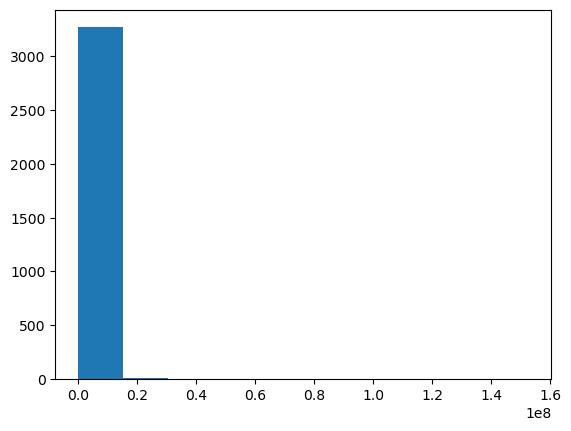

In [70]:
#Visualisation de la r√©partition des fr√©quentations par gare
plt.hist(df_gares_merged['total_voyageurs_non_voyageurs_2020'])
plt.show()

On remarque que pour mieux appr√©cier les fr√©quentations, il est n√©cessaire de passer au log.

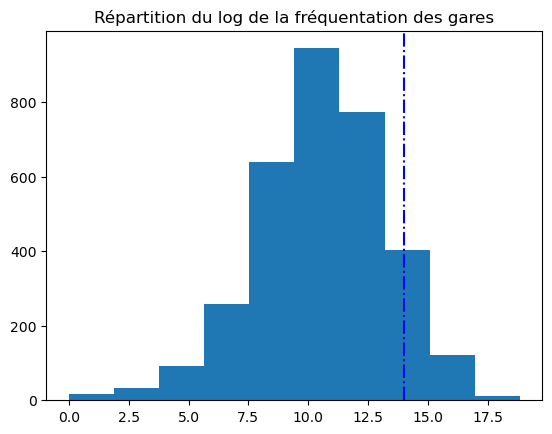

In [71]:
df_gares_merged['log_total_voyageurs_non_voyageurs_2020'] = np.log(df_gares_merged['total_voyageurs_non_voyageurs_2020'])
plt.hist(df_gares_merged['log_total_voyageurs_non_voyageurs_2020'])
plt.title("R√©partition du log de la fr√©quentation des gares")
plt.axvline(x = 14, color = 'b', linestyle = '-.')
plt.show()

In [72]:
#Application d'un filtre sur les frequentations : on ne garde que les gares les plus frequent√©es (√† droite de la droite verticale bleue)
df_gares_principales = df_gares_merged[df_gares_merged['log_total_voyageurs_non_voyageurs_2020']>= 14]

On regarde maintenant les gares tr√®s fr√©quent√©es pour lesquelles il nous manque les coordonn√©es GPS. A savoir, les gares qui sont dans le dataset des fr√©quentations mais pas dans celui de la liste des gares.

In [73]:
df_gares_manquantes  = df_gares_principales[df_gares_principales['x_wgs84'].isna()==True]
df_gares_manquantes

code_uic  total_voyageurs_non_voyageurs_2020  \
384   87756403                             4085871   
664   87113795                             3664906   
1195  87113704                             2380920   
1488  87758607                             7980634   
1533  87116046                             2496908   
1806  87113209                             3862190   
1808  87758904                           107666015   
1852  87654798                             2865667   
1855  87113696                             3206275   
2347  87113522                             1562549   
2565  87116038                             1913470   
3023  87113779                             1240481   
3132  87113746                             2091668   
3146  87113001                            27242868   
3294  87113712                            17692029   

                                     nom_gare  x_wgs84  y_wgs84  \
384                        Monaco-Monte-Carlo      NaN      NaN   
664   Villiers-sur-Marne - Le Plessis-Tr√©vise      NaN      NaN   
1195                          Rosny-sous-Bois      NaN      NaN   
1488                      Ch√¢telet les Halles      NaN      NaN   
1533         √âmerainville - Pontault-Combault      NaN      NaN   
1806                                   Pantin      NaN      NaN   
1808                       Paris Gare du Nord      NaN      NaN   
1852                               Rosa Parks      NaN      NaN   
1855                       Rosny Bois Perrier      NaN      NaN   
2347                          Le Ch√©nay Gagny      NaN      NaN   
2565                           Roissy-en-Brie      NaN      NaN   
3023                Les Boullereaux Champigny      NaN      NaN   
3132                      Nogent - Le Perreux      NaN      NaN   
3146                                Paris Est      NaN      NaN   
3294                          Val de Fontenay      NaN      NaN   

      log_total_voyageurs_non_voyageurs_2020  
384                                15.223045  
664                                15.114313  
1195                               14.682998  
1488                               15.892528  
1533                               14.730564  
1806                               15.166745  
1808                               18.494545  
1852                               14.868312  
1855                               14.980620  
2347                               14.261829  
2565                               14.464429  
3023                               14.031010  
3132                               14.553472  
3146                               17.120302  
3294                               16.688625

- **Probl√®me** : il nous manque les donn√©es GPS de gares importantes (la gare de Paris EST par exemple)
- **Solution** : ces gares √©tant -presque- toutes situ√©es en r√©gion Ile de France (idf) on va aller chercher ces donn√©es sur l'API de la r√©gion idf.

On sort donc les donn√©es manquantes de ce dataframe et on va aller les chercher sur l'API idf (il nous manquera tout de m√™me la gare de Monaco mais nous allons l'omettre car il ne s'agit que d'une gare et que Monaco n'est pas en France √† proprement parl√©).

In [74]:
#Elimination des gares dont on ne connait pas la fr√©quentation
df_gares_principales = df_gares_principales[df_gares_principales['x_wgs84'].isna()==False]

In [75]:
#R√©cup√©ration des donn√©es manquantes (sauf Monaco) gr√¢ce √† l'API de la r√©gion idf
df_region_idf_initial = importer("https://data.iledefrance.fr/api/v2/catalog/datasets/gares-et-points-darrets-du-reseau-transilien/exports/json?limit=-1&offset=0&timezone=UTC")

#On se restreint aux gares dont les donn√©es geographiques sont manquantes dans le dataframe des gares principales
df_region_idf = df_region_idf_initial[df_region_idf_initial.code_uic.isin(df_gares_manquantes['code_uic'])==True]
df_region_idf

code_uic    uic7               libelle_point_d_arret  \
62   87113209  871132                              PANTIN   
166  87116038  871160                      ROISSY EN BRIE   
207  87113696  871136                  ROSNY BOIS PERRIER   
228  87654798  876547                          Rosa Parks   
241  87113522  871135                     LE CHENAY GAGNY   
326  87113795  871137  VILLIERS SUR MARNE PLESSIS TREVISE   
327  87113779  871137           LES BOULLEREAUX CHAMPIGNY   
341  87113746  871137                   NOGENT LE PERREUX   
369  87113712  871137                     VAL DE FONTENAY   
404  87113704  871137                     ROSNY SOUS BOIS   
408  87113001  871130           PARIS EST (GARE DE L'EST)   
478  87116046  871160    EMERAINVILLE - PONTAULT COMBAULT   
490  87758607  877586                 CHATELET LES HALLES   

                                libelle  \
62                               PANTIN   
166                      ROISSY EN BRIE   
207                  ROSNY BOIS PERRIER   
228                          Rosa Parks   
241                     LE CHENAY GAGNY   
326  VILLIERS SUR MARNE PLESSIS TREVISE   
327           LES BOULLEREAUX CHAMPIGNY   
341                   NOGENT LE PERREUX   
369                     VAL DE FONTENAY   
404                     ROSNY SOUS BOIS   
408                           PARIS EST   
478      EMERAINVILLE PONTAULT COMBAULT   
490                 Ch√¢telet les Halles   

                    libelle_stif_info_voyageurs libelle_sms_gare  \
62                               GARE DE PANTIN           Pantin   
166                      GARE DE ROISSY EN BRIE     Roissy en B.   
207                  GARE DE ROSNY BOIS PERRIER      Rosny B. P.   
228                          GARE DE ROSA PARKS             None   
241                        GARE DE CHENAY GAGNY     Chenay-Gagny   
326  GARE DE VILLIERS SUR MARNE PLESSIS TREVISE         Villiers   
327              GARE DES BOULLEREAUX CHAMPIGNY      Boullereaux   
341                   GARE DE NOGENT LE PERREUX     Nogent le P.   
369                     GARE DE VAL DE FONTENAY     Val de Font.   
404                     GARE DE ROSNY SOUS BOIS     Rosny Sous B   
408                               GARE DE L EST             None   
478       GARE D'EMERAINVILLE PONTAULT COMBAULT     Emerainville   
490                         CHATELET LES HALLES             None   

                                    nom_gare  \
62                                    Pantin   
166                           Roissy-en-Brie   
207                  Rosny-sous-Bois Perrier   
228                               Rosa Parks   
241                          Gagny le Ch√™nay   
326  Villiers-sur-Marne - Le Plessis-Tr√©vise   
327                Les Boullereaux Champigny   
341                      Nogent - Le Perreux   
369                          Val de Fontenay   
404                          Rosny-sous-Bois   
408                                Paris Est   
478         √âmerainville - Pontault-Combault   
490                      Ch√¢telet les Halles   

                                               adresse code_insee_commune  \
62                      Avenue de la gare 93500 Pantin              93055   
166              Place de la gare 77680 Roissy-en-Brie              77390   
207                Rue L√©on Blum 93110 Rosny sous bois              93064   
228                                 Rue Gaston Tessier              75119   
241                 5 rue du chemin de fer 93220 Gagny              93032   
326       place Pierre S√©mard 94350 VILLIERS-SUR-MARNE              94079   
327  Avenue Danielle Casanova 94500 Champigny sur M...              94017   
341            place du Th√©√¢tre 94130 NOGENT-SUR-MARNE              94052   
369  10 avenue du Val de Fontenay 94120 Fontenay-so...              94033   
404  1 place des Martyrs de la R√©sistance 93110 ROS...              93064   
408                Place 11 Novembre 1918, 75010 Paris          

**Remarque :** il nous manque encore la gare du Nord. En allant chercher manuellement la ligne correspondante, on remarque que c'est parce que le code uic est erron√© (le code uic est diff√©rent dans les 2 bases). Apr√®s recherches, le vrai code uic est celui de la base idf. On le rectifie manuellement.

In [76]:
#Mise en √©vidence de l'erreur
print(df_region_idf_initial[df_region_idf_initial['libelle']=="PARIS NORD"][['libelle', 'code_uic']])
print(df_gares_manquantes[df_gares_manquantes['nom_gare']== "Paris Gare du Nord"][['nom_gare', 'code_uic']])

       libelle  code_uic
92  PARIS NORD  87271031
                nom_gare  code_uic
1808  Paris Gare du Nord  87758904


In [77]:
#Rectification de l'erreur, puis r√©iteration de l'op√©ration qui r√©cup√®re uniquement les gares manquantes
df_gares_manquantes.loc[df_gares_manquantes['nom_gare']=="Paris Gare du Nord", "code_uic"] = "87271031"
df_region_idf = df_region_idf_initial[df_region_idf_initial.code_uic.isin(df_gares_manquantes['code_uic'])==True]

#Pour simplifier, reset de l'index
df_region_idf.reset_index(inplace = True)
df_region_idf = df_region_idf.drop('index', axis=1)

In [78]:
#R√©cuperation des donnees gps pour la nouvelle base de donnees : s√©paration des donn√©es g√©ographiques en 2 colonnes (latitude et longitude)
df_region_idf['x_wgs84'] = [0]*len(df_region_idf)
df_region_idf['y_wgs84'] = [0]*len(df_region_idf)

for i in range(len(df_region_idf)):
    df_region_idf.loc[i,'x_wgs84'] = df_region_idf['coord_gps_wgs84'][i]['lon']
    df_region_idf.loc[i,'y_wgs84'] = df_region_idf['coord_gps_wgs84'][i]['lat']
    

In [79]:
#Enfin, concat√©nation des dataframes venant de l'API SNCF et de l'API r√©gion IDF
df_complete_gares = pd.concat([df_gares_principales, df_region_idf], ignore_index = True)[['code_uic','nom_gare','x_wgs84','y_wgs84','log_total_voyageurs_non_voyageurs_2020']]
df_complete_gares.head()

code_uic                      nom_gare   x_wgs84    y_wgs84  \
0  87271460  A√©roport Charles de Gaulle 1  2.555964  49.008827   
1  87741132       Aix-les-Bains le Revard  5.908901  45.688112   
2  87741132       Aix-les-Bains le Revard  5.908892  45.688219   
3  87583005                     Angoul√™me  0.164145  45.653643   
4  87382002            B√©con les Bruy√®res  2.268813  48.905170   

   log_total_voyageurs_non_voyageurs_2020  
0                               14.593896  
1                               14.027522  
2                               14.027522  
3                               14.083956  
4                               15.299272

On finit, apr√®s quelques ajustements, par obtenir le dataset souhait√© des gares les plus fr√©quent√©es ainsi que leurs coordonn√©es GPS. On s'en reservira plus tard, dans la partie Visualisation et Repr√©sentation Gprahique de ce travail.

### **1.2 Analyse des retards et des annulations de trains de la SNCF**

Pour cette partie, on travaille exclusivement sur le dataset **regularite-mensuelle-tgv-aqst** qui contient l'ensemble des donn√©es sur les retards et les annulations des lignes de TGV g√©r√©es par la SNCF. On commence par importer et nettoyer les donn√©es.

In [80]:
df_retards = importer('https://ressources.data.sncf.com/api/v2/catalog/datasets/regularite-mensuelle-tgv-aqst/exports/json?limit=-1&offset=0&timezone=UTC')
df_retards.head(2)

date   service         gare_depart        gare_arrivee  duree_moyenne  \
0  2018-01  National               BREST  PARIS MONTPARNASSE            225   
1  2018-01  National  PARIS MONTPARNASSE           ANGOULEME            126   

   nb_train_prevu  nb_annulation commentaire_annulation  \
0             284              3                   None   
1             239              4                   None   

   nb_train_depart_retard  retard_moyen_depart  ...  nb_train_retard_sup_15  \
0                       4             2.250000  ...                      19   
1                      36             6.347685  ...                      15   

  retard_moyen_trains_retard_sup15  nb_train_retard_sup_30  \
0                         5.370390                       5   
1                         4.113191                       3   

   nb_train_retard_sup_60  prct_cause_externe prct_cause_infra  \
0                       2           33.333333        53.333333   
1                       0           15.384615        38.461538   

   prct_cause_gestion_trafic  prct_cause_materiel_roulant  \
0                   0.000000                    13.333333   
1                  19.230769                    23.076923   

   prct_cause_gestion_gare  prct_cause_prise_en_charge_voyageurs  
0                 0.000000                                   0.0  
1                 3.846154                                   0.0  

[2 rows x 26 columns]

In [81]:
#On retire les colonnes de commentaires qui sont generalement vides
df_retards = df_retards.drop('commentaire_annulation', axis = 1)
df_retards = df_retards.drop('commentaire_retards_depart', axis = 1)
df_retards = df_retards.drop('commentaires_retard_arrivee', axis = 1)

In [82]:
#On retire aussi les colonnes de NaN et dont les retards valent 0 qui ne nous interessent pas ici
df_retards.dropna(inplace = True)
df_retards = df_retards.drop(df_retards[df_retards['retard_moyen_arrivee']==0].index)

In [84]:
#On copie le dataframe initial par securite
df_retards_initial = df_retards.copy()

On cr√©e ensuite les colonnes susceptibles de nous interesser dans la partie visualisation.

In [85]:
df_retards['prct_nb_train_depart_retard'] = df_retards['nb_train_depart_retard']/df_retards['nb_train_prevu']*100
df_retards['prct_nb_annulation'] = df_retards['nb_annulation']/df_retards['nb_train_prevu']*100

In [86]:
#On enl√®ve les valeurs infinies possibles dans les colonnes cr√©√©es et on s√©pare la date en 2 colonnes distinctes selon le mois et l'ann√©e
df_retards[df_retards['prct_nb_train_depart_retard'] == np.inf] = 0
df_retards[df_retards['prct_nb_annulation'] == np.inf] = 0
df_retards[['annee','mois']]=df_retards.date.str.split('-',expand=True)
df_retards['annee'] = pd.to_numeric(df_retards['annee'])
df_retards['mois'] = pd.to_numeric(df_retards['mois'])

Fin de la r√©cup√©ration et du traitement de nos donn√©es.

## **2. VISUALISATION : Analyse Descriptive et Repr√©sentation Graphique**

Dans cette partie, on se concentre sur des analyses statistiques des donn√©es qui nous int√©ressent et leur repr√©sentation graphique. Cela nous permettra de tirer les premi√®res conclusions quant √† l'√©tat et l'√©volution du r√©seau ferr√© fran√ßais et des perturbations qu'il subit.

### **2.1 Cartographie du r√©seau ferr√© de la SNCF**

On va simplement utiliser le dataset cr√©e dans la **partie 1.1** afin de repr√©senter les principales gares de la SNCF (en terme de fr√©quentation) sur une carte int√©rractive.

In [87]:
#Visualisation de la map des gares sur le territoire fran√ßais avec une carte int√©ractive

m = folium.Map(location=[45.8666, 2.3333], min_zoom=3, max_zoom=14, zoom_start=5.3, tiles = 'Stamen Terrain')
#affichage des gares principales dont on avait les donnees gps par l'API SNCF
for i in df_complete_gares.index:
    tooltip = df_complete_gares['nom_gare'][i]
    folium.Marker([df_complete_gares['y_wgs84'][i],df_complete_gares['x_wgs84'][i]], popup=df_complete_gares['nom_gare'][i], tooltip=tooltip).add_to(m)

m

On remarque que la gare **Paris EST**, dont les donn√©es g√©ographiques manquaient dans la base de donn√©es initiale (API SNCF), appara√Æt bien.

<img src="Paris_EST.png" alt="Drawing" style="width: 400px;"/>

### **2.2 Analyse statistique des taux de retards et d'annulations des trains de la SNCF**

Dans cette partie, comme dans la derni√®re partie d√©di√©e √† la mod√©lisation, on utilise les donn√©es sur les retards des TGV pr√©cedemment trait√©es.

#### **2.2.1 Analyse de l'√©volution et de l'effet de substitution des taux de retard et d'annulation**

Dans cette partie, on va s'int√©resser √† l'√©volution des taux de retard et d'annulation des TGV de la SNCF depuis 2018. On va reguli√®rement faire appel √† la fonction **aggreg_mensuel** qui permet de renvoyer la liste √† 12 √©l√©ments (un pour chaque mois) d'une donn√©e num√©rique d'un dataset par ann√©e. On commence par analyser les taux de retard.

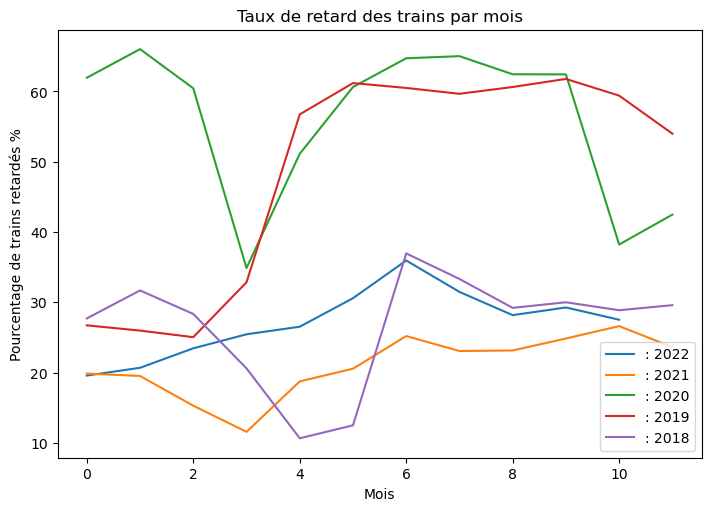

In [28]:
fig, ax = plt.subplots(figsize=(7, 5), layout='constrained')
#On trace la courbe pour chaque ann√©e renseign√©e dans le dataset
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_train_depart_retard',2022), label=': 2022')
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_train_depart_retard',2021), label=': 2021')
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_train_depart_retard',2020), label=': 2020')
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_train_depart_retard',2019), label=': 2019')
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_train_depart_retard',2018), label=': 2018')
ax.set_xlabel('Mois')  
ax.set_ylabel('Pourcentage de trains retard√©s %') 
ax.set_title("Taux de retard des trains par mois")  
ax.legend()
plt.show()

On remarque une tendance √† la baisse des retards entre F√©vrier et Avril suivi d'une remont√©e jusqu'en Juin. Par ailleurs, les ann√©es 2019 et 2020 ont √©t√© particuli√®rement p√©nibles au niveau des retards. Pour essayer de mettre mieux en valeur les ph√©nom√®nes d√©cris, on va plut√¥t tracer la courbe √©tal√©e sur l'enti√®ret√© de la p√©riode.

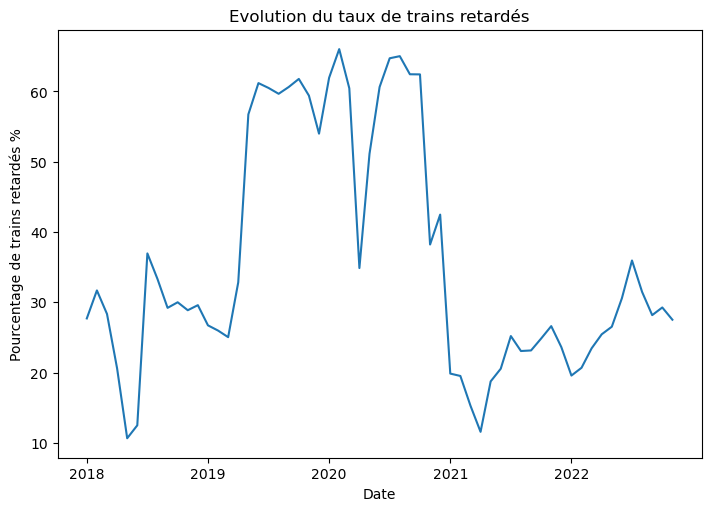

In [88]:
#On fait appel √† la fonction aggreg_totale qui conct√®ne juste les r√©sultats de la fonction aggreg_mensuel sur les 4 ann√©es disponnibles.
R =  aggreg_totale(df_retards, 'prct_nb_train_depart_retard')
fig, ax = plt.subplots(figsize=(7, 5), layout='constrained')
ax.plot(R)
ax.set_xlabel('Date')  
ax.set_ylabel('Pourcentage de trains retard√©s %') 
ax.set_title("Evolution du taux de trains retard√©s")
plt.xticks([0,12,24,36,48],['2018', '2019', '2020', '2021', '2022'])
plt.show()

On observe encore mieux l'effet cyclique des retards des trains. Au d√©but de chaque nouvelle ann√©e, on observe une diminuation du pourcentage de trains en retards suivi d'une remont√© √† partir de la fin du premier tier de l'ann√©e. 

Maintenant, il serait int√©ressant de comparer le taux de retard avec le taux d'annulation pour voir si une baisse du taux de retard est en fait compens√© par une augmentation du taux d'annulation. On rep√®te le m√™me proc√©d√© pour avoir la courbe des taux mensuels d'annulation.

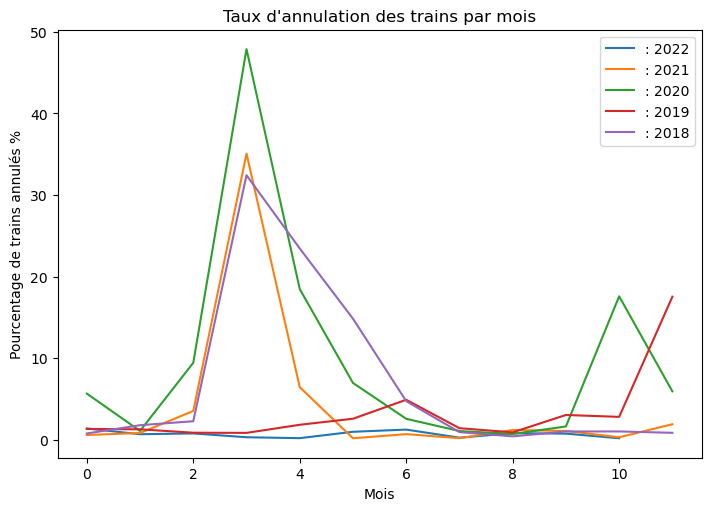

In [30]:
fig, ax = plt.subplots(figsize=(7, 5), layout='constrained')
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_annulation',2022), label=': 2022')
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_annulation',2021), label=': 2021')
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_annulation',2020), label=': 2020')
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_annulation',2019), label=': 2019')
ax.plot(aggreg_mensuel(df_retards, 'prct_nb_annulation',2018), label=': 2018')
ax.set_xlabel('Mois')  
ax.set_ylabel('Pourcentage de trains annul√©s %') 
ax.set_title("Taux d\'annulation des trains par mois")  
ax.legend()
plt.show()   

Ici, on voit clairement qu'entre f√©vrier et avril, il y a un pic du nombre d'annulation des trains. On affiche la courbe √©tal√©e sur toute la p√©riode pour rendre le ph√©nom√®ne encore plus lisible.


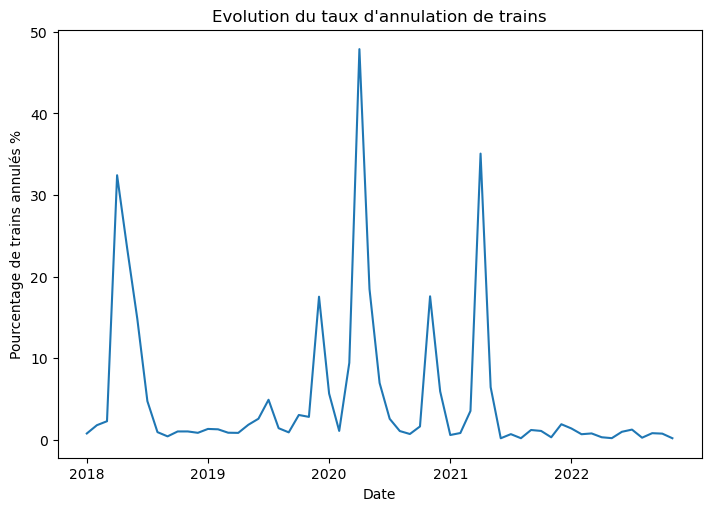

In [31]:
A = aggreg_totale(df_retards, 'prct_nb_annulation')
fig, ax = plt.subplots(figsize=(7, 5), layout='constrained')
ax.plot(A)
ax.set_xlabel('Date')  
ax.set_ylabel('Pourcentage de trains annul√©s %') 
ax.set_title("Evolution du taux d\'annulation de trains")
plt.xticks([0,12,24,36,48],['2018', '2019', '2020', '2021', '2022'])
plt.show()

C'est encore plus clair ici, en 2018, 2020 et 2021 on observe le m√™me pic d'annulation en d√©but d'ann√©e. Cela correspond au m√™me moment o√π on observait une baisse du taux de trains retard√©s. On peut donc afficher sur le m√™me graphe l'√©volution du taux d'annulation et de retard pour mettre en avant le ph√©nom√®ne de substitution.

Pour finir cette premi√®re partie, on peut rassembler les 2 m√©triques sur un m√™me graphique pour illustrter de fa√ßon convaincante l'effet de substitution entre les retards et les annulations de la SNCF.

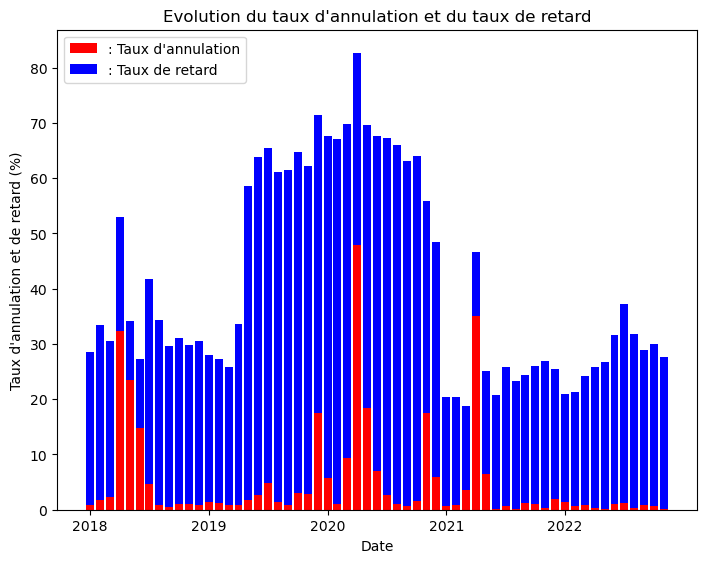

In [32]:
ind = np.arange(len(A)) 
width = 0.8
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, A, width, color='r')
ax.bar(ind, R, width,bottom=A, color='b')
ax.set_ylabel('Taux d\'annulation et de retard (%)')
ax.set_xlabel('Date')
ax.set_title('Evolution du taux d\'annulation et du taux de retard')
ax.legend(labels=[': Taux d\'annulation', ': Taux de retard'])
plt.xticks([0,12,24,36,48],['2018', '2019', '2020', '2021', '2022'])
plt.show()

#### **2.2.1 Analyse descriptifve de l'√©volution des causes de retard**

On va maintenant s'int√©resser aux motifs des retards des TGV de la SNCF. Pour cela, on utilie la m√™me fonction aggreg_totale pour voir l'√©volution des causes des retards dans le temps.

In [33]:
#Pour chaque cause, on cr√©e la liste qui contient le pourcentage de responsabilit√© des retards sur chaque p√©riode
E = aggreg_totale(df_retards, 'prct_cause_externe')
I = aggreg_totale(df_retards, 'prct_cause_infra')
G = aggreg_totale(df_retards, 'prct_cause_gestion_trafic')
M = aggreg_totale(df_retards, 'prct_cause_materiel_roulant')
GG = aggreg_totale(df_retards, 'prct_cause_gestion_gare')
V = aggreg_totale(df_retards, 'prct_cause_prise_en_charge_voyageurs')

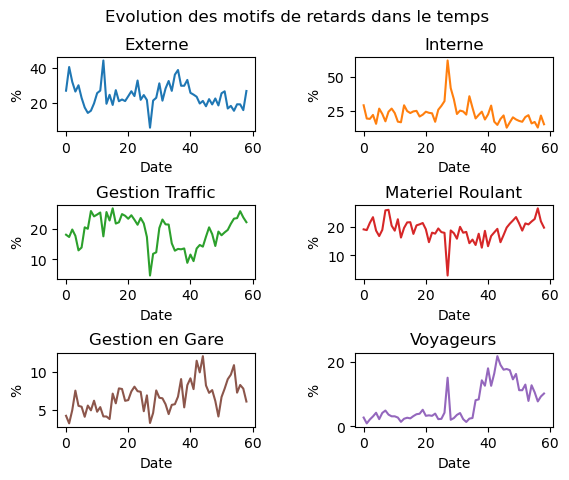

In [34]:
#On trace les 6 courbes d'√©volution pour chaque motif de retard
fig, axs = plt.subplots(3, 2)
fig.suptitle('Evolution des motifs de retards dans le temps')
axs[0, 0].plot(E)
axs[0, 0].set_title('Externe')
axs[0, 1].plot(I, 'tab:orange')
axs[0, 1].set_title('Interne')
axs[1, 0].plot(G, 'tab:green')
axs[1, 0].set_title('Gestion Traffic')
axs[1, 1].plot(M, 'tab:red')
axs[1, 1].set_title('Materiel Roulant')
axs[2, 0].plot(GG, 'tab:brown')
axs[2, 0].set_title('Gestion en Gare')
axs[2, 1].plot(V, 'tab:purple')
axs[2, 1].set_title('Voyageurs')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='%')
    plt.gcf().subplots_adjust(wspace = 0.5, hspace = 1)     

Les 6 graphes sont difficilement interpr√©tables et on pr√©f√®rera les afficher tous sur un m√™me graphe aggr√©g√© pour mieux saisir les dynamiques gr√¢ce √† la commande stackplot. 

In [89]:
#On commence par cr√©er la liste O qui contient le pourcentage des autres causes que celles indiqu√©es dans notre dataset
O = []
for i in range(60):
    x = 100 - E[i]- I[i]- G[i]- M[i]- GG[i]- V[i]
    O.append(x)

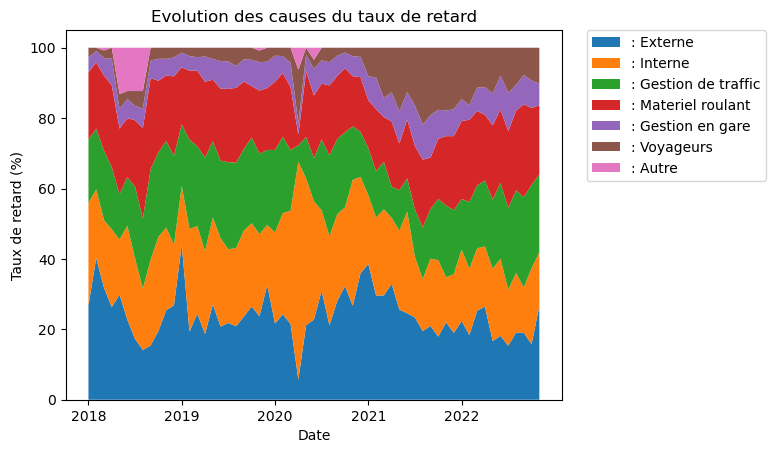

In [90]:
#On trace le graphe avec la fonction stackplot
C = [E, I, G, M, GG, V, O]
inde = range(1,61)
fig, ax = plt.subplots()
ax.stackplot(inde, C)
ax.set_ylabel('Taux de retard (%)')
ax.set_xlabel('Date')
ax.set_title('Evolution des causes du taux de retard')
ax.legend(labels=[': Externe', ': Interne',': Gestion de traffic',': Materiel roulant',': Gestion en gare',': Voyageurs', ': Autre' ], bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.xticks([1,13,25,37,49],['2018', '2019', '2020', '2021', '2022'])
plt.show()

On remarque que les causes externes, internes, gestion de traffic et mat√©riel roulant repr√©sentent plus de 80% des causes totales de retards avant 2021. Il est int√©ressant de voir qu'√† partir de 2021, les retards caus√©s par les voyageurs augmente de fa√ßon √©tonnante. Dans la prochaine partie, on va essayer d'√©tablir des liens de causalit√©s entre le nombre de retards et les incidents de diff√©rentes natures avant de tenter de pr√©dire l'√©volution des perturbations du r√©seau SNCF.

## **3. MOD√âLISATION des retards de la SNCF**

Dans cette partie, on cherche √† expliquer les retards gr√¢ce √† des variables explicatives. Dans un premier temps, nous allons mod√©liser le jeu de donn√©es existant en adoptant une approche √©conom√©trique. Puis, nous nous int√©resserons √† la pr√©diction de nouvelles donn√©es avec une approche plus orient√©e machine learning.

### **3.1. Pr√©paration des donn√©es pour la r√©gression**

In [37]:
#R√©cup√©ration de la base 
df_retards = df_retards_initial.copy()

In [38]:
#Listage des diff√©rentes causes de retards du dataframe
causes_retards = ['cause_materiel_roulant', 'cause_infra', 'cause_gestion_trafic', 'cause_externe', 'cause_gestion_gare', 'cause_prise_en_charge_voyageurs']
causes_retards_large = ['cause_materiel_roulant', 'cause_infra', 'cause_gestion_trafic', 'cause_externe', 'cause_gestion_gare', 'cause_prise_en_charge_voyageurs', 'nb_train_prevu']

In [39]:
#On passe les causes de retards en niveau plut√¥t qu'en pourcentage pour homog√©n√©iser les donn√©es
#On utilise pour cela la fonction niveau qui est dans le fichier fonctions.py
niveau(df_retards,df_retards['nb_train_retard_arrivee'], causes_retards).head(2)

date   service         gare_depart        gare_arrivee  duree_moyenne  \
0  2018-01  National               BREST  PARIS MONTPARNASSE            225   
1  2018-01  National  PARIS MONTPARNASSE           ANGOULEME            126   

   nb_train_prevu  nb_annulation  nb_train_depart_retard  retard_moyen_depart  \
0             284              3                       4             2.250000   
1             239              4                      36             6.347685   

   retard_moyen_tous_trains_depart  ...  prct_cause_gestion_trafic  \
0                         0.032028  ...                   0.000000   
1                         0.751560  ...                  19.230769   

   prct_cause_materiel_roulant  prct_cause_gestion_gare  \
0                    13.333333                 0.000000   
1                    23.076923                 3.846154   

   prct_cause_prise_en_charge_voyageurs  cause_materiel_roulant  cause_infra  \
0                                   0.0                2.533333    10.133333   
1                                   0.0                6.461538    10.769231   

   cause_gestion_trafic  cause_externe  cause_gestion_gare  \
0              0.000000       6.333333            0.000000   
1              5.384615       4.307692            1.076923   

   cause_prise_en_charge_voyageurs  
0                              0.0  
1                              0.0  

[2 rows x 29 columns]

In [40]:
#Elimination des valeurs excessives
df_retards = df_retards.drop(df_retards[df_retards['nb_train_retard_arrivee']>170].index)
df_retards = df_retards.drop(df_retards[df_retards['nb_train_retard_arrivee']==1].index)

(array([2359., 1979., 1198.,  636.,  383.,  210.,  112.,   67.,   37.,
          18.]),
 array([  2. ,  18.7,  35.4,  52.1,  68.8,  85.5, 102.2, 118.9, 135.6,
        152.3, 169. ]),
 <BarContainer object of 10 artists>)

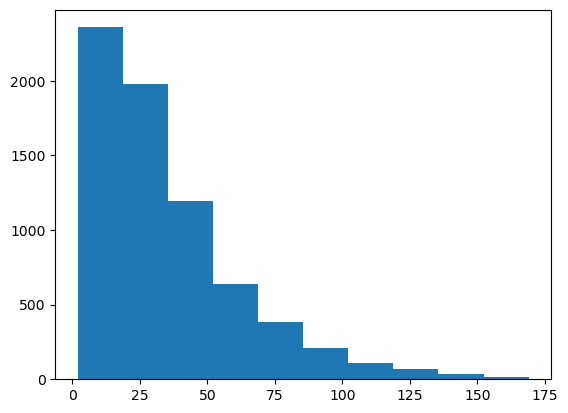

In [41]:
#Visualisation des donn√©es pour la variable expliqu√©e
plt.hist(df_retards['nb_train_retard_arrivee'])

In [42]:
#Sym√©trisation des donn√©es en passant au log
df_retards.loc[:,'log_nb_train_retard_arrivee']  = np.log(df_retards['nb_train_retard_arrivee'])

In [43]:
#Copie du dataframe initiale (par securit√©)
df_retards_2 = df_retards.copy()

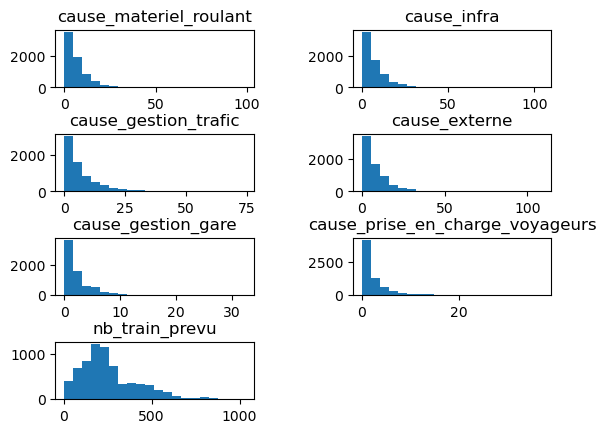

In [44]:
#Visualisation des donn√©es pour les variables explicatives
        
afficher_hist(df_retards, causes_retards_large)

In [45]:
#Sym√©trisation en passant au log pour les 7 premi√®res variables
for i in range(len(causes_retards_large[:-1])):
    df_retards.loc[:,'log_'+causes_retards_large[i]]  = np.log(df_retards[causes_retards_large[i]]+1)

In [46]:
#Listage des "causes" en log
log_causes_retards = ['log_cause_materiel_roulant', 'log_cause_infra', 'log_cause_gestion_trafic', 'log_cause_externe', 'log_cause_gestion_gare', 'log_cause_prise_en_charge_voyageurs']
log_causes_retards_large = ['log_cause_materiel_roulant', 'log_cause_infra', 'log_cause_gestion_trafic', 'log_cause_externe', 'log_cause_gestion_gare', 'log_cause_prise_en_charge_voyageurs', 'nb_train_prevu']

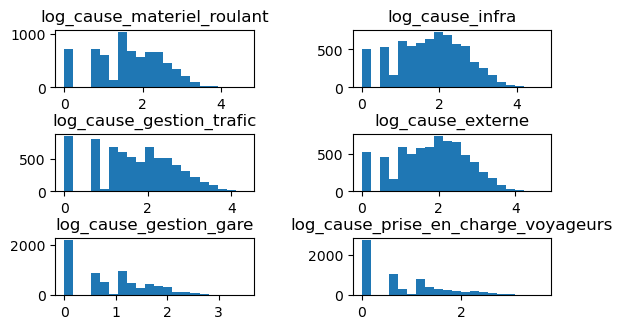

In [47]:
#Visualisation des donn√©es sym√©tris√©es

afficher_hist(df_retards, log_causes_retards_large[:-1])

In [48]:
#Recalibrage des donn√©es 

features = df_retards[log_causes_retards_large]
features = StandardScaler().fit(features.values).transform(features.values)
df_retards[log_causes_retards_large] = features
df_retards.head(2)

date   service         gare_depart        gare_arrivee  duree_moyenne  \
0  2018-01  National               BREST  PARIS MONTPARNASSE            225   
1  2018-01  National  PARIS MONTPARNASSE           ANGOULEME            126   

   nb_train_prevu  nb_annulation  nb_train_depart_retard  retard_moyen_depart  \
0        0.146255              3                       4             2.250000   
1       -0.124384              4                      36             6.347685   

   retard_moyen_tous_trains_depart  ...  cause_externe  cause_gestion_gare  \
0                         0.032028  ...       6.333333            0.000000   
1                         0.751560  ...       4.307692            1.076923   

   cause_prise_en_charge_voyageurs  log_nb_train_retard_arrivee  \
0                              0.0                     2.944439   
1                              0.0                     3.332205   

   log_cause_materiel_roulant  log_cause_infra  log_cause_gestion_trafic  \
0                   -0.457946         0.688447                 -1.721556   
1                    0.394474         0.751027                  0.199253   

   log_cause_externe  log_cause_gestion_gare  \
0           0.165287               -1.191275   
1          -0.189600               -0.239078   

   log_cause_prise_en_charge_voyageurs  
0                            -0.994188  
1                            -0.994188  

[2 rows x 36 columns]

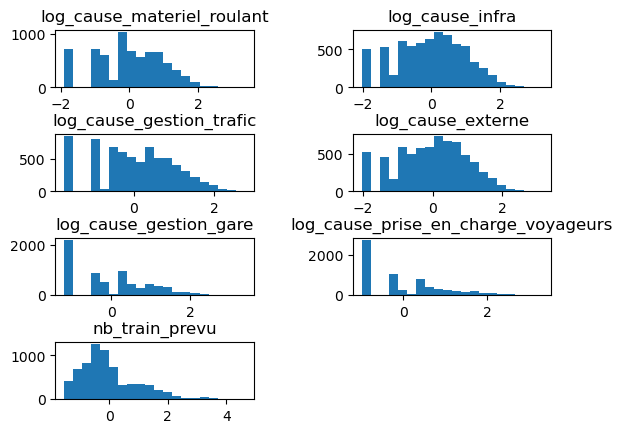

In [49]:
#Visualisation des donn√©es

afficher_hist(df_retards, log_causes_retards_large)

Ici, les donn√©es sont correctes donc on a pas besoin de passer au log.

### **3.2 Premi√®re r√©gression √† une variable**

In [50]:
#Appel de la fonction r√©gression du fichier fonctions.py

results_s = regression(df_retards[['cause_externe']], df_retards[['nb_train_retard_arrivee']])
print(results_s.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     8087.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:45:32   Log-Likelihood:                -30559.
No. Observations:                6999   AIC:                         6.112e+04
Df Residuals:                    6997   BIC:                         6.114e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.8059      0.311     50.894

Le R^2, caract√©ristique du pouvoir explicatif du mod√®le, est d'environ 0.54 (1 correspondant √† une pr√©diction parfaite). De plus, la variable cause_externe est significative.

### **3.3 R√©gression √† plusieurs variables**

In [51]:
#On passe maintenant √† une r√©gression √† plusieurs variables
results = regression(df_retards[log_causes_retards_large], df_retards[['nb_train_retard_arrivee']])
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     4412.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:45:34   Log-Likelihood:                -27334.
No. Observations:                6999   AIC:                         5.468e+04
Df Residuals:                    6991   BIC:                         5.474e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

**Analyse des coefficients**

Le R^2 de la regression est satisfaisant et a largement augment√© (en ajoutant des variables, on augmente le pouvoir explicatif du mod√®le sous certaines conditions). Toutes les variables sont explicatives au seuil de 1%. Le coefficient le plus √©lev√© est celui de log_cause_gestion_trafic. Il signifie qu'une hausse de 1% des incidents de gestion de traffic (1 + nombre de probl√®mes de gestion de trafic) augmente d'environ 7 le nombre de trains en retard par ligne et par mois.


**Conclusion** : selon cette regression, l'incident impliquant le plus de retard (en **nombre**) est la gestion du trafic. 
Dans quelle mesure la SNCF pourrait-elle r√©duire le nombre de retard en travaillant sur ce point ? 
Pour le savoir, il faut adopter une approche plus orient√©e machine learning qui permet de faire des pr√©dictions. C'est l'objet de la partie suivante.

### **3.4 Pr√©diction**

intercept :  3.201123828611061
coeffs :  [0.19872879 0.22452473 0.22520658 0.24616387 0.08912178 0.09321534
 0.03854647]
rsq :  0.9061063417740779
rmse :  0.2816078334022755



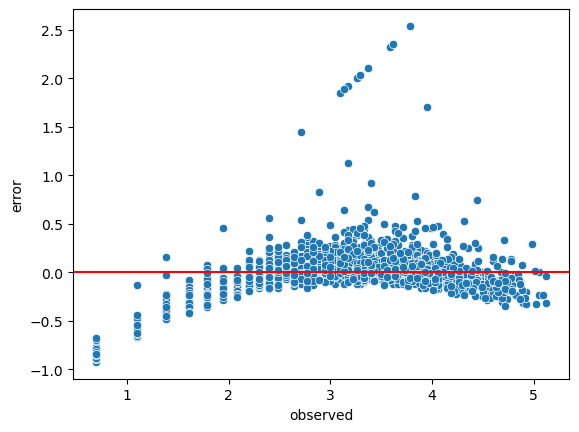

In [52]:
x = df_retards[log_causes_retards_large]
y = df_retards['log_nb_train_retard_arrivee']

prediction(x, y)
print()

On remarque de le mod√®le souffre d'un probl√®me de sp√©cification. Nous allons proc√©der √† la s√©lection de variables avec le lasso.

### **3.5 S√©lection des variables avec  le LASSO**

In [53]:
#Estimation du mod√®le LASSO
X_train = prediction(x, y, afficher = False)[0]
y_train = prediction(x, y, afficher = False)[1]

lasso1 = Lasso(fit_intercept=True,normalize=False, alpha = 0.00655).fit(X_train,y_train)

#selection de variables
features_selec = x.columns[np.abs(lasso1.coef_)>0].tolist()
features_selec 

#N'h√©sitez pas √† refaire tourner la cellule si elle ne selectionne aucune ou une seule variable

/opt/mamba/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


['log_cause_materiel_roulant', 'log_cause_gestion_gare']

In [54]:
#corr√©lations entre les variables s√©lectionn√©es
corr = df_retards[features_selec].corr()

plt.figure()
p = corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)
p

/tmp/ipykernel_136/2425215618.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  p = corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


<Figure size 640x480 with 0 Axes>

Les variables ne sont pas exag√©r√©ment corr√©l√©es. Lorsque la variable nb_train_prevu est s√©lectionn√©e, c'est la plus correl√©e aux autres variables ce qui est assez intuitif : plus on pr√©voit de trains, plus il y a des chances d'avoir de probl√®mes de gestion trafic ou de gestion en gare par exemple. 

intercept :  3.1982463125344593
coeffs :  [0.54097834 0.28877701]
rsq :  0.6348074979162188
rmse :  0.5509554441356177



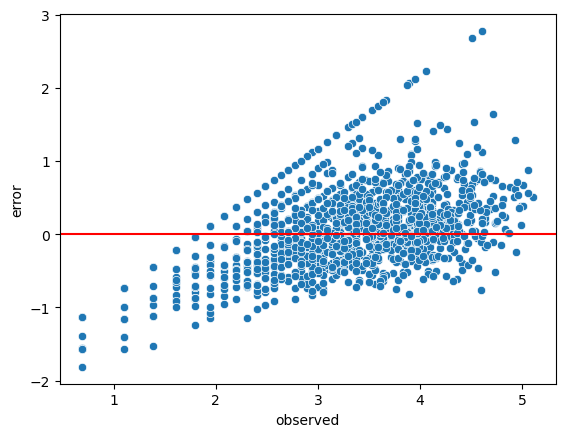

In [55]:
x = df_retards[features_selec]
y = df_retards['log_nb_train_retard_arrivee']

prediction(x, y)
print()

Notre mod√®le souffre toujours d'un probl√®me de sp√©cification, mais il est tout de m√™me meilleur que le pr√©c√©dent. 

## **Bonus: Jeu interactif**

En plus de nos analyses statistiques et √©conom√©triques, nous avons profit√© de ce projet Python pour s'entrainer √† developper un petit jeu. Vous pouvez maintenant ouvrir le dossier **mini_jeu** afin d'essayer de sauver vos f√™tes de fin d'ann√©e en √©vitant tous les retards.

## **Conclusion**

#### **Apports**

Ce projet nous a permis de mettre en application l'ensemble des notions vu pendant le cours de **Python pour la data science** dispens√© en 2√®me ann√©e √† l'ENSAE Paris. Il nous a permis de nous confronter √† des probl√®mes de natures diverses et √† les surmonter gr√¢ce √† diff√©rents outils. L'utilisation de Git, par exemple, a √©t√© un outil nouveau et pr√©cieux pour la r√©alisation de ce projet, au m√™me titre que nos connaissances th√©oriques acquises avec le cours d'**Econometrics** de l'ENSAE. L'ensemble du groupe a pu s'investir dans chacune des parties du projet et en retirer des enseignements utlies.

#### **Bilan**

Gr√¢ce √† la partie d'**Analyse statistique et graphique**, nous avons pu identifier et illustrer la p√©riodicit√© des retards ainsi que l'effet de substitution entre retards et annulations. Cela peut donner des premi√®res pistes de travail pour la SNCF afin de mieux cibler de potentielles mesures en vue de r√©duire le nombre de perturbations sur le r√©seau ferr√© qu'elle g√®re. L'analyse des causes des retards principalement men√© dans la partie **Mod√©lisation** vient renforcer et pr√©ciser nos conclusions pr√©c√©dentes. On a pu identifier la principale source de perturbation, √† savoir les incidents de gestion du traffic, et essayer de pr√©dire les cons√©quences futures. Cela peut √™tre un outil pr√©cieux aux gestionnaires de la SNCF afin d'essayer de mieux anticiper les perturbations et proposer des r√©ponses plus adapt√©es aux usagers.

#### **Limites**

Bien entendu, nous aurions pu pousser plus loin notre analyse dans chacune des parties. Une piste int√©ressante que nous avions envisag√© (mais finalement d√©laiss√© faute de temps) aurait √©t√© de croiser notre analyse des retards avec celle de la fr√©quentation. Cependant, nous avons √©t√© bloqu√© par les formats trop diff√©rents des 2 datasets qui rendaient compliqu√© leur concat√©nation (celui des retards traite de lignes de trains alors que celui des fr√©quentations traite des gares). Il pourrait √™tre int√©ressant de reprendre ce travail un peu fastidieux afin de pr√©ciser encore un peu plus nos analyses. On pourrait en faire de m√™me en utilisant encore d'autres datasets disponnibles sur l'API afin de trouver de nouveaux liens de causalit√©s ou am√©liorer nos pr√©dictions.